In [54]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import math

In [55]:
df =pd.read_csv('titanic-training-data.csv')

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df.shape

(891, 12)

In [58]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [59]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# ANALYSE THE DATA

<AxesSubplot:xlabel='Survived', ylabel='count'>

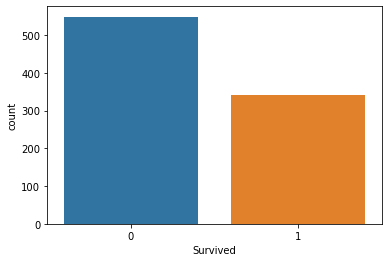

In [61]:
sns.countplot(x ="Survived",data =df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

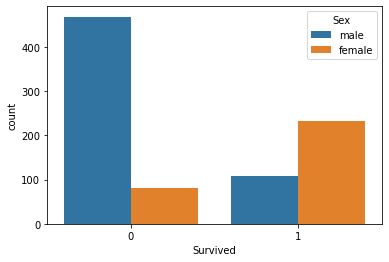

In [62]:
sns.countplot(x="Survived",hue ="Sex",data =df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

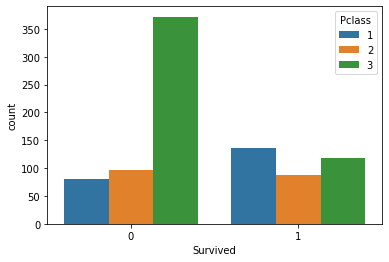

In [63]:
sns.countplot(x ="Survived",hue="Pclass",data =df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

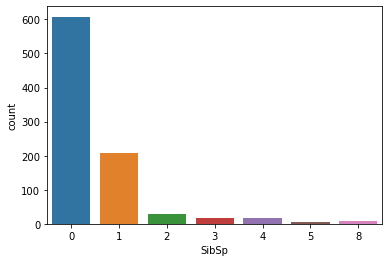

In [64]:
sns.countplot(x ="SibSp",data =df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

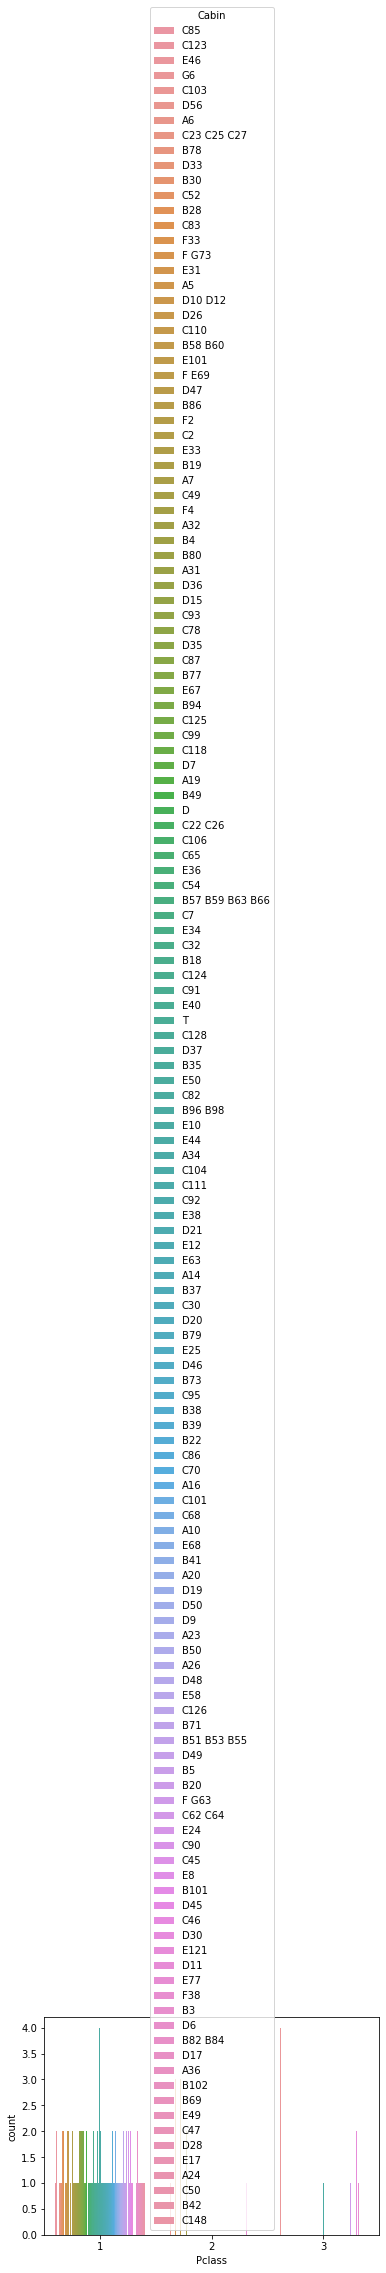

In [65]:
sns.countplot(x ="Pclass",hue ="Cabin",data =df)

<AxesSubplot:xlabel='Ticket', ylabel='count'>

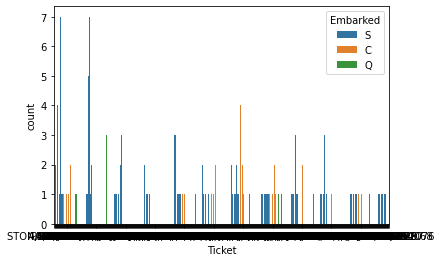

In [66]:
sns.countplot(x ="Ticket",hue="Embarked",data =df)

# DATA WRANGLING

In [67]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

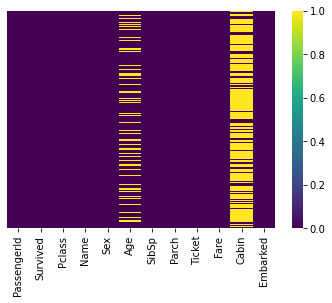

In [68]:
sns.heatmap(df.isnull(),yticklabels =False,cmap ='viridis')
#heat plot for missed values


In [69]:
df.drop("Cabin",axis=1,inplace =True)
df.dropna(inplace =True)

<AxesSubplot:>

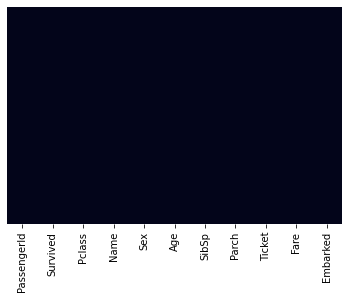

In [70]:
sns.heatmap(df.isnull(),yticklabels =False,cbar =False)

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [72]:
sex =pd.get_dummies(df["Sex"])
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [73]:
sex =pd.get_dummies(df["Sex"],drop_first =True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [74]:
embark =pd.get_dummies(df["Embarked"])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [75]:
embark =pd.get_dummies(df["Embarked"],drop_first =True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [76]:
pcl =pd.get_dummies(df["Pclass"],drop_first =True)
pcl

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


In [77]:
df =pd.concat([df,sex,embark,pcl],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [78]:
df.drop(["Sex","Embarked","PassengerId","Name","Ticket",'Pclass',"Fare"],axis=1,inplace=True)
df.head()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


# split the data

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [80]:
x =df.drop("Survived",axis =1)
y =df["Survived"]

In [81]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.30,random_state =22)

# fit the model

In [82]:
model =LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Akhil\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
predictions =model.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8504672897196262

In [85]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       133
           1       0.79      0.83      0.81        81

    accuracy                           0.85       214
   macro avg       0.84      0.85      0.84       214
weighted avg       0.85      0.85      0.85       214



In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[115,  18],
       [ 14,  67]], dtype=int64)

<AxesSubplot:>

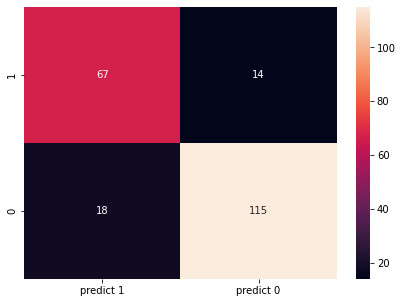

In [87]:
cm =metrics.confusion_matrix(y_test,predictions,labels =[1,0])
df_cm =pd.DataFrame(cm,index =[i for i in ["1","0"]],
                   columns =[i for i in ["predict 1","predict 0"]])
plt.figure(figsize =(7,5))
sns.heatmap(df_cm,annot =True,fmt ='g')

In [88]:
#Example

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [90]:
df1 =pd.read_csv("pima-indians-diabetes-2.csv")
df1

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [92]:
df.describe()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,29.642093,0.514045,0.432584,0.636236,0.039326,0.778090,0.242978,0.498596
std,0.491139,14.492933,0.930692,0.854181,0.481420,0.194506,0.415823,0.429183,0.500350
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,38.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
df1.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:xlabel='class', ylabel='count'>

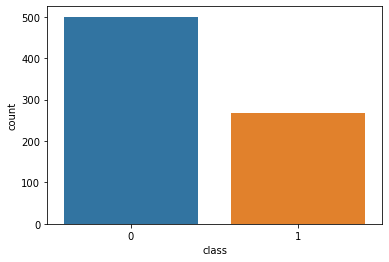

In [94]:
sns.countplot(x ="class",data =df1)

In [95]:
#sns.countplot(x ="class",hue ="age",data =df1)

In [96]:
#splitting of data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [97]:
x =df1.drop("class",axis =1)
y =df1["class"]

In [98]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.30,random_state =32)

In [99]:
#model fitting
model =LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Akhil\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
predictions =model.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7835497835497836

In [102]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       147
           1       0.76      0.60      0.67        84

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[131,  16],
       [ 34,  50]], dtype=int64)

<AxesSubplot:>

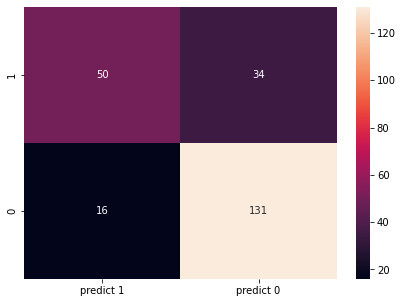

In [104]:
cm =metrics.confusion_matrix(y_test,predictions,labels =[1,0])
df_cm =pd.DataFrame(cm,index =[i for i in ["1","0"]],
                   columns =[i for i in ["predict 1","predict 0"]])
plt.figure(figsize =(7,5))
sns.heatmap(df_cm,annot =True,fmt ='g')

In [105]:
# sumary --->change all the zeros to mean or median except the independent variable

# BAGGING model

In [106]:
from sklearn.ensemble import BaggingClassifier

bgcl =BaggingClassifier(n_estimators =50 , base_estimator =dTree,random_state=42)

bgcl =bgcl.fit(X_train,y_train)

NameError: name 'dTree' is not defined